**EC 414 - Spring 2019**

**HW 4 - QDA/LDA & Logistic Regression 1**

Due:  Wednesday Feb 27 (In class)

**1) Obtaining QDA & LDA Decision Rules: **

In this problem, we will consider Quadratic and Linear Discriminant Analysis for $m$ classes where $y \in \{1,...,m \}$ represents a class index. In class, we looked at the simple 2-class LDA. Using the MPE (Most Probable Explanation) rule: 

$h_{MPE} (\boldsymbol{x})= \text{argmax}_{y} p(y|\boldsymbol{x},\theta)$, 

obtain the QDA & LDA decision rules: 

$h_{QDA} (\boldsymbol{x}) = \text{argmin}_y [\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y) + \frac{1}{2} \text{log} (\text{det}(\Sigma_y)) - \text{log} (p(y))]$,

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y [(\boldsymbol{\mu}_y^T \Sigma^{-1} ) \cdot \boldsymbol{x} - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))]$.

Please show all intermediate steps in your analysis. As a tip, it may be expedient to use Bayes Rule in your analysis along with the fact that, for QDA:

$p(\boldsymbol{x}|y,\theta) = N(\boldsymbol{\mu}_y,\Sigma_y)(\boldsymbol{x}) = \frac{1}{((2 \pi)^d \text{ det}(\Sigma_y))^{1/2}} e^{\frac{1}{2} (\boldsymbol{x}-\boldsymbol{\mu}_y)^T \Sigma_y^{-1} (\boldsymbol{x}-\boldsymbol{\mu}_y)}$, 

and for LDA:

$ \Sigma_y = \Sigma \text{ } \forall \text{ } y \in \{1,...,m \}$.




**2) Implementation of LDA**

In this problem, we will explore the implementation and application of LDA on an artificial dataset. Using any built in Python command/function for LDA in this problem is prohibited.  

a) Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-7,-7]^T, \boldsymbol{\mu}_3 = [-8,-1]^T$,

$\Sigma = [[0.5,0];[0,0.5]]$.

Let each cluster of data have $500$ points. Plot the generated Gaussian data.

([<matplotlib.axis.XTick at 0x7fbb28498a90>,
 <a list of 10 Text xticklabel objects>)

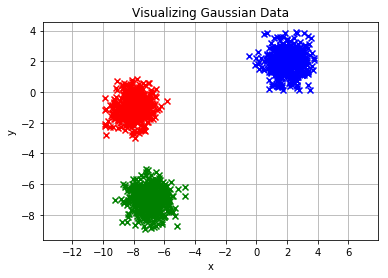

In [80]:
# Write code here:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

def scatter_plot(x_axis, y_axis, x_label, y_label, color, title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = 'x', zorder = 3)
    plt.xlabel(x_label)
    plt.grid(zorder=0)
    plt.ylabel(y_label)
    if (title != ''):
        plt.title(title)
        
mean_one = np.array([2,2])
mean_two = np.array([-7,-7])
mean_three = np.array([-8,-1])
covariance = np.array([[0.5,0],[0,0.5]])
one = np.random.multivariate_normal(mean_one, covariance, 500)
two = np.random.multivariate_normal(mean_two, covariance, 500)
three = np.random.multivariate_normal(mean_three, covariance, 500)
x_one = [i[0] for i in one]
y_one = [i[1] for i in one]
x_two = [i[0] for i in two]
y_two = [i[1] for i in two]
x_three = [i[0] for i in three]
y_three = [i[1] for i in three]

scatter_plot(x_one, y_one, "x", "y", 'b', "Visualizing Gaussian Data")
scatter_plot(x_two, y_two, "x", "y", 'g')
scatter_plot(x_three, y_three, "x", "y", 'r')
plt.axis('equal')
plt.xticks(np.arange(-12, 7, 2.0))

b) Randomly split all the data and labels into training and testing sets using an $85\%$/$15\%$  train/test split. 

In [81]:
# Write code here:
# x_total = x_one + x_two + x_three
# y_total = y_one + y_two + 
x_train_one, x_test_one = train_test_split(one, test_size=0.15)
x_train_two, x_test_two = train_test_split(two, test_size=0.15)
x_train_three, x_test_three = train_test_split(three, test_size=0.15)

c) Obtain the necessary parameter values for ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$) used for obtaining the LDA decision rule derived in Q$1$.  As a reminder, the preceding values can be obtained as:

$\widehat{p}(y) = \frac{n_y}{n}$,

$\widehat{\boldsymbol{\mu}}_y = \frac{1}{n_y} \sum_{i \in \{ 1,...,n\}: y = y_j} \boldsymbol{x}_i$,

$\widehat{\Sigma} = \frac{1}{n} \sum_{i=1}^n (\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})(\boldsymbol{x}_i-\widehat{\boldsymbol{\mu}}_{y_i})^T$,

where $n$ is the number of training data points and $n_y$ is the number of occurrences of class $y$ in the training set. 

Please display the resulting values of the preceding variables using print statements.  

In [82]:
# Write code here:
total_num_of_data = 3*len(x_train_one)

p_y = np.zeros((1,3))
p_y[0][0] = len(x_train_one)/total_num_of_data
p_y[0][1] = len(x_train_two)/total_num_of_data
p_y[0][2] = len(x_train_three)/total_num_of_data

mean = np.zeros((3,2))
for i in range(len(x_train_one)):
    mean[0] += x_train_one[i]
    mean[1] += x_train_two[i]
    mean[2] += x_train_three[i]

mean[0] /= len(x_train_one)
mean[1] /= len(x_train_two)
mean[2] /= len(x_train_three)

covariance = np.zeros((2,2))
tmp = np.zeros((2,2))
for i in x_train_one:
    tmp += (i - mean[0])*((i-mean[0]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
for i in x_train_two:
    tmp += (i - mean[1])*((i-mean[1]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
for i in x_train_three:
    tmp += (i - mean[2])*((i-mean[2]).reshape(1,2).T)
covariance += tmp/total_num_of_data
tmp = np.zeros((2,2))
print("p:\n", p_y)
print("Empirical means:\n", mean)
print("Covariance matrix:\n",covariance)

p:
 [[0.33333333 0.33333333 0.33333333]]
Empirical means:
 [[ 2.02000883  1.99962153]
 [-6.99039799 -6.99673102]
 [-8.01187914 -1.01696798]]
Covariance matrix:
 [[0.49918892 0.04243784]
 [0.04243784 0.51651692]]


d) Since we know ($\widehat{\boldsymbol{\mu}}_y \text{ } \forall \text{ } y$,$\widehat{\Sigma}$,$\widehat{p}(y)$), we can in turn obtain the LDA decision rule. Let:

$\boldsymbol{\beta}_y = \Sigma^{-1} \boldsymbol{\mu}_y $,

$\alpha_y = - \frac{1}{2} \boldsymbol{\mu}_y^T \Sigma^{-1} \boldsymbol{\mu}_y + \text{log}(p(y))$;

with this, the LDA decision rule can be re-expressed as:

$h_{LDA} (\boldsymbol{x}) = \text{argmax}_y \text{ } \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$.  

The objective function in the preceding equation basically projects $\boldsymbol{x}$ into $1$ dimension and offsets it.  

Obtain and display the values of $\boldsymbol{\beta}_y \forall y$ and $\alpha_y \forall y$ using print statements.

In [95]:
# Write code here:
beta = np.zeros((3,2))
alpha = np.zeros((3,1))

inv_covariance = inv(covariance)
for i in range(3):
    beta[i] = inv_covariance @ mean[i]
print("Beta:\n",beta)

for i in range(3):
    alpha[i] = -1/2* mean[i] @ inv_covariance @ mean[i] + np.log(p_y[0][i])
print("alpha:\n",alpha)

Beta:
 [[  3.74361247   3.56377624]
 [-12.94231923 -12.482625  ]
 [-15.99412724  -0.65479328]]
alpha:
 [[ -8.44277924]
 [-90.00337824]
 [-65.50307136]]


e) Using the derived LDA decision rule, obtain and display the Correct Classification Rates (CCR) for the training and testing sets. Also, explain the resulting CCRs.

In [342]:
 # Write code here:

LDA - Train CCR:  1.0
LDA - Test CCR:  1.0


f) Here, we will test our LDA classifier on $5$ new data points:
    
$\boldsymbol{x}_1 = [10,10]^T,\boldsymbol{x}_2 = [-10,10]^T,\boldsymbol{x}_3 = [-10,-10]^T,\boldsymbol{x}_4 = [10,-10]^T,\boldsymbol{x}_5 = [0,0]^T$

Plot these new test points along with the original Gaussian data on a new figure. For each new test point, compute the score of the test point belonging to class $y \text{ } \forall \text{ } y \in \{1,...,m \}$ as:  $\text{score}_y = \boldsymbol{\beta}_y^T \boldsymbol{x} + \alpha_y$ and display the scores using print statements.  

Describe the resulting scores and rationalize why they make sense based on proximity of a new test point to a certain data cluster.   

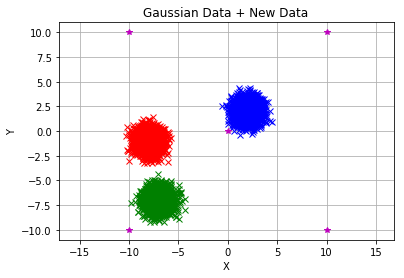

KEY:  Blue - 1, Green - 2, Red - 3

[[ 10  10]
 [-10  10]
 [-10 -10]
 [ 10 -10]
 [  0   0]]
[[  69.29821359 -370.93516672 -242.21475317]
 [  -8.08723811  -96.04733214   74.6881108 ]
 [ -87.10913006  177.08794229  111.32425476]
 [  -9.72367836  -97.7998923  -205.57860922]
 [  -8.90545823  -96.92361222  -65.44524921]]


In [335]:
# Write code here:

**3) Logistic Regression**

In this problem, we will implement Logistic Regression using the built in capability (from sklearn).

Form a Logistic Regression classifer using the training data from Q$2$ and apply it to the training and testing sets from Q$2$. Obtain the CCRs for the training and testing sets; also, explain the resulting CCRs. 

In [97]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_one, y_one)
# Write code here:

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.02427084  2.29486492  2.95670983  2.2013387   2.997905    2.30502586
  1.74273743  2.43160331  2.24496992  1.31050415  1.69430198  2.48651281
  1.31817006  1.74452959  1.1066631   2.1394031   0.94882608  2.64404616
  2.35572942  1.17915019  2.82412577  0.83834415  2.20969199  1.95978128
  1.44788416  1.95109998  2.2145668   2.11226988  1.72981719  1.71481777
  2.3226581   2.12729019  1.77619064  2.36382366  1.55150034  1.35754805
  1.99981867  3.70612782  2.49394235  2.2535606   1.8155328   2.7183021
  1.32003016  1.85790582  1.82827234  2.3831966   2.05174347  2.12008059
  2.28497422  1.33033606  1.65423412  2.97483268  1.5330587   1.22522585
  1.71235347  2.13576393  1.94979558  2.96488013  1.1047875   2.45136802
  1.84810069  3.08088829  3.53407843  1.62684642  1.97397475  2.155129
  1.84995384  1.14792223  3.16802713  1.57571125  1.91008412  1.48311935
  2.34039167  0.94359784  2.17372811  2.98117795  2.78234909  1.68696202
  2.84127901  2.16131206  2.21887996  1.47536698  2.33503262  3.13190469
  2.51121702  2.30268055  2.17149883  2.0718923   1.88769693  2.68739502
  2.44228833  2.10373606  2.00341542  2.09049348  0.52170233  1.85320571
  1.99880363  1.80738864  1.8424185   1.68156523  1.19850656  1.77157088
  1.33582849  0.83131174  1.65498245  1.66249335  1.71007673  1.90779482
  1.27303796  1.52682578  2.66616161  1.37864508  2.17442437  1.85453752
  1.77806576  1.93620218  2.22542141  1.77443869  2.05180309  1.72685737
  2.03510107  2.49710598  1.91421352  2.20644663  0.80906316  0.7007708
  1.01928     2.67800209  2.11560179  2.7094594   1.49184919  2.35998808
  2.53460581  0.98757614  2.62065685  2.04052194 -0.09607128  2.61790306
  2.33819523  2.89043509  2.43286872  2.50947127  2.8434207   2.10620983
 -0.49963316  1.31859006  0.14252568  2.19326193  0.1402451   1.75222664
  1.56427593  1.23917113  1.67564663  3.15103907  3.62145302  1.77382006
  2.97097061  2.26648351  1.28787291  0.84959618  2.05754925  2.96533488
  1.80213065  0.72073213  2.31284194  1.69781979  1.52876371  1.66314585
  3.49585088  2.54892552  2.40791118  2.32778929  0.84473491  3.37267838
  1.23790587  1.31095033  1.07570039  1.95658309  2.74326592  2.47904566
  3.34562613  1.14866971  1.50091983  2.24685189  0.47170121  3.38461704
  0.97938928  1.87612389  2.64893638  1.66732676  1.67836899  2.68043504
  2.1408489   2.1978573   1.60518422  1.44171989  2.13817752  2.65756743
  1.95311435  1.15505528  1.68898657  2.53895633  2.02429607  1.92057646
  2.31644218  1.63086094  2.01687122  3.13348861  1.43743635  0.07923398
  1.84726055  2.64318565  2.20062389  1.42278729  0.38595543  2.62635439
  2.36469633  1.30036597  2.36516247  3.38555347  3.19530677  2.52670073
  2.83553543  1.4679642   2.27243477  2.45211622  1.00456134  2.97022874
  1.55305155  1.53702114  2.60078925  2.83683288  2.37578637  1.81228599
  3.0961594   1.20699915  1.44777387  1.30476335  1.5046297   1.47012662
  1.5430411   3.27559885  2.07072741  1.65679752  1.53739228  3.74469307
  2.00120293  3.23031263  3.73477245  2.16389564  1.29872956 -0.02696762
  2.11099972  1.40399085  2.13269902  1.6437189   1.43607017  1.34826866
  1.87673434  1.62779239  1.64757093  2.6090953   2.02455015  1.92041674
  1.67520594  2.00741986  1.36911154  1.6176512   2.08309765  1.74169556
  0.44846487  2.39835079  3.08147383  2.71752658  2.67947389  1.41539998
  1.93771951  2.24913557  2.57289492  2.98664274  2.30359198  1.26957997
  2.1155247   1.83694941  2.57432207  2.43401161  2.40096021  1.9709225
  0.92213419  2.91479232  2.02451472  3.36504283  1.31512717  2.39244492
  1.45638961  1.06334714  2.38112155  2.8065565   1.39884096  0.67758189
  2.81773579  1.34078213  2.82502778  0.11083979  2.44878991  2.08938196
  2.08511015  1.47670138  1.89710122  1.01988546  0.99717712  1.89937437
  1.7109654   2.56483465  3.25325024  1.67695661  1.52953601  1.47381535
  1.98752614  1.51833477  0.96909951  2.89005678  1.81751391  1.38911604
  2.97246364  1.74928893  2.09134404  3.33703149  1.72477656  1.95954922
  2.99872076  1.92962991  2.07458205  1.8347891   2.43593322  1.39619233
  2.5769453   2.26642969  2.70826934  2.25808476  2.09185395  0.82128997
  2.8545405   1.09371131  1.66559825  2.72826625  1.87664063  2.49721211
  2.21417499  2.07782562  0.98102171  0.79734794  2.17652553  2.53239224
  2.01793256  1.61020814  1.8911615   2.47213843  1.88062402  1.45051073
  3.1342375   3.31476265  0.77941464  2.40023076  2.24466897  1.64142184
  2.22012791  0.81015925  2.69030582  3.41905859  2.99709175  2.49502099
  1.78192303  1.13630067  0.29988404  1.5371614   1.69984711  2.80301637
  0.81118506  3.23339166  3.30565166  2.25129737  1.68719704  2.10353139
  1.2888301   1.84012442  1.79447142  2.06198579  1.46679927  2.83737272
  3.31245479  1.8722691   1.84031268  1.93725376  2.51150859  1.20972095
  2.95071373  2.00484489  1.62466381  1.69657643  1.33594917  2.57724433
  1.99338243  2.27461591  2.17425491  2.45070343  1.8856749   2.9557858
  1.74200958  1.88422145  1.77761672  2.61979558  1.75804481  1.59219985
  2.90225998  2.61464547  2.18562844  2.84451605  2.7824557   2.77799912
  1.37786257  1.92898917  2.82941286  1.8141612   2.67005192  2.47232404
  3.29740162  2.68564599  1.41498158  0.67750147  1.33792487  1.52140376
  2.25310413  2.04868795  2.39063384  3.14808963  0.68694323  2.3491809
  0.76781522  1.21513746  2.65138415  2.67158188  2.63698656  3.00980145
  2.96445096  0.46751358  0.6190283   1.87680852  1.03174202  2.21839752
  2.56132343  3.02711859  1.0617089   0.95804171  2.25827521  2.38450044
  1.17179478  1.88951733  1.03363816  1.85988955  2.91713847  2.49734436
  0.94803522  1.1601925   2.49662359  2.4172031   2.73524794  1.88895568
  1.27117178  2.0200452   3.0363009   1.13609406  2.29589203  1.03544422
  2.62697917  1.17747972  3.62669566  2.62966518  2.06581075  3.13333116
  2.2031016   2.02122     2.3383385   2.51340554  2.36054749  1.8187665
  3.08057587  2.66149829  2.21935036  2.12203971  0.99092659  2.12112755
  3.49735612  2.07173577  2.03876882  2.65824684  2.18187487  1.55667603
  2.85148432  3.29928138].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.